In [1]:
import os
! cd "/home/changl25/Image-to-text-of-Stable-Diffusion"
work_dir = "/home/changl25/Image-to-text-of-Stable-Diffusion"
os.chdir(work_dir)

In [2]:
! ls /data/changl25/
# ! mkdir /data/changl25/Diffusion2DB
data_dir = "/data/changl25/Diffusion2DB"
os.chdir(data_dir)

checkpoints	  sample			   undress_checkpoints.zip
data0		  shared			   VITONHD.ckpt
Diffusion2DB	  SHHQ				   VITON_HD_processed_1015.zip
DiffusionDB	  SHHQ_padded			   VITON_retest
img2textModel	  SHHQ_padded.zip		   zalando
lsun		  SHHQ_unpadded_low_res		   zalando-hd-resized
lsun_bedroom.zip  street_512_320_vitonhd-like	   zalando-hd-resized.zip
__MACOSX	  street_512_320_vitonhd-like.zip
no_segment.zip	  street_cross_test


In [2]:
from urllib.request import urlretrieve
from json import load
from PIL import Image
from os.path import join
import time

import numpy as np
import shutil

import torch
import torchvision
import requests
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration

from datasets import load_dataset
from dataset_diffusionDB import DiffusionDB
from torch.utils.data import DataLoader

%load_ext autoreload
%autoreload 2


/home/changl25/miniconda3/envs/img2txt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"
precision = "float16"

In [4]:
# https://github.com/huggingface/transformers/blob/main/src/transformers/models/blip/processing_blip.py
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base", torch_dtype=torch.float16).to(device) if precision == "float16" \
    else  BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")


## Load in cache

In [1]:
dataset = load_dataset('poloclub/diffusiondb', 'large_random_1k')

/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for poloclub/diffusiondb contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/poloclub/diffusiondb
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


a beautiful african woman runs towards her light yellow labrador, rough vibrant watercolor painting, bold large brushstrokes, thick oil paint, expressive, drips, spatters, and lively irregular edges, scribble fade 


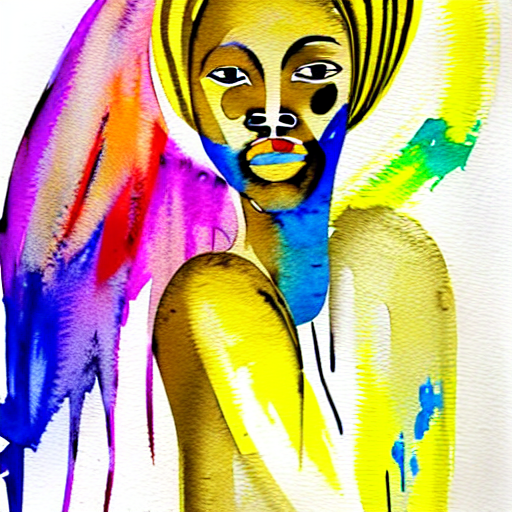

In [16]:
my_1k_data = dataset['train']

random_i = np.random.choice(range(my_1k_data.num_rows))

# Print out the prompt of this image
print(my_1k_data['prompt'][1])

# Display this image
image = my_1k_data['image'][1]
display(image)

## Manually get image

### one image sample

In [7]:
img_url = 'https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg' 
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')

# conditional image captioning
text = "a photography of"
for i in range(10):
    inputs = processor(raw_image, text, return_tensors="pt").to("cuda", torch.float16)
    out = model.generate(**inputs)
    print(processor.decode(out[0], skip_special_tokens=True))
    text = processor.decode(out[0], skip_special_tokens=True)
    # >>> a photography of a woman and her dog

# # unconditional image captioning
# inputs = processor(raw_image, return_tensors="pt").to("cuda", torch.float16)

# out = model.generate(**inputs)
# print(processor.decode(out[0], skip_special_tokens=True))



/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control thegeneration length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of detailed dog and woman on the beach
detaileda photography of detailed dog and woman on the beach
detaileddetaileda photography of detailed dog and woman on the beach
detaileddetaileddetaileda photography of detailed dog and woman on the beach
detaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach
detaileddetaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach


/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 22, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 24, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


detaileddetaileddetaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach
detaileddetaileddetaileddetaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach


/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 27, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 29, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


detaileddetaileddetaileddetaileddetaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach
detaileddetaileddetaileddetaileddetaileddetaileddetaileddetaileddetaileda photography of detailed dog and woman on the beach


/home/changl25/miniconda3/envs/StableVITON/lib/python3.10/site-packages/transformers/generation/utils.py:1268: UserWarning: Input length of input_ids is 32, but `max_length` is set to 20. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(


### Download a subset

In [ ]:
# Example to get data from part-000001
# Download part-000001.zip
part_id = 1
part_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/images/part-{part_id:06}.zip'
urlretrieve(part_url, f'part-{part_id:06}.zip')

('part-000001.zip', <http.client.HTTPMessage at 0x145dc2fd0>)

In [ ]:
# Unzip part-000001.zip
shutil.unpack_archive(f'part-{part_id:06}.zip', f'part-{part_id:06}')

{'p': 'symmetry!! a tiny cute chinese spring festival oriental tale mascot snake - phoenix toys, magic, intricate, smooth line, light dust, mysterious dark background, warm top light, hd, 8 k, smooth ， sharp high quality artwork in style of greg rutkowski, concept art, blizzard warcraft artwork, bright colors ', 'se': 75054762, 'c': 14.0, 'st': 50, 'sa': 'k_lms'}


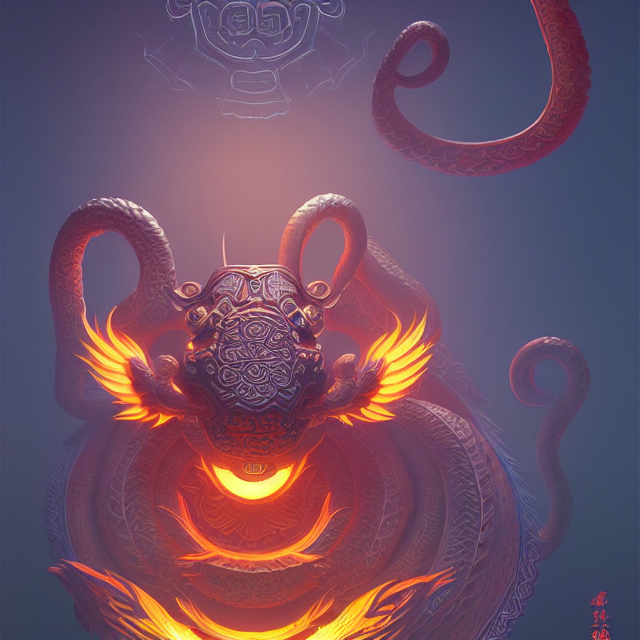

In [ ]:
# Access the images and their prompts and hyperparameters
part_data = load(open(f'part-{part_id:06}/part-{part_id:06}.json', 'r', encoding='utf8'))

# Load the image
random_img_name = np.random.choice(list(part_data.keys()), 1)[0]
img = Image.open(join(f'part-{part_id:06}', random_img_name))

# Display the image with its prompt and hyperparameters
print(part_data[random_img_name])
display(img)


### Evaluate

In [6]:
batch_size = 8

In [7]:

from dataset_diffusionDB import DiffusionDB
img_size = 512
root_path = '/data/changl25/DiffusionDB/part-000001'
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize((img_size, img_size)),
    torchvision.transforms.ToTensor(),
])
test_dataset = DiffusionDB(root_path, text = "a photo of", transform=processor)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [17]:
def evaluate(model, processor, test_loader, precision="float32"):
    evaluate_text = [] 
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            inputs, prompt = data
            for key, value in inputs.items():
                if precision == "float32":
                    inputs[key] = value.to(device)
                elif precision == "float16":
                    inputs[key] = value.to(device, torch.float16)
            out = model.generate(**inputs)
            out_text1 = processor.batch_decode(out, skip_special_tokens=True)
            evaluate_text.append((out_text1, prompt))
            # print((prompt, out_text1))
    return evaluate_text

In [18]:
start_time = time.time()
evaluate_text = evaluate(model, processor, test_loader, precision=precision)
print("Evaluate time for each image", (time.time() - start_time) / (len(evaluate_text) * batch_size))

Evaluate time for each image 0.7031950225830078


In [5]:
file_path = "record.csv"

In [26]:
# text: [(predict(batch), prompt(batch))]
with open(file_path, "w", encoding='utf-8') as file:
    for i in range(len(evaluate_text)):
        output_text_batch, prompt_batch = evaluate_text[i]
        for j in range(len(output_text_batch)):
            output_text, prompt = output_text_batch[j], prompt_batch[j]
            file.write(f"{output_text}_____{prompt}\n")

In [9]:
import sys
sys.path.append("/data/changl25/sentence-transformers/")
from sentence_transformers import SentenceTransformer, models

st_model = SentenceTransformer('/data/changl25/all-MiniLM-L6-v2')

In [22]:
prompts = []
output_prompt = []
with open(file_path, 'r') as file:
    for line in file.readlines():
        output, gt = line.split("_____")
        prompts.append(gt)
        output_prompt.append(output)

prompt_embedding = st_model.encode(prompts).flatten()
output_embedding = st_model.encode(output_prompt).flatten()
similarity = np.dot(prompt_embedding, output_embedding) / (np.linalg.norm(prompt_embedding) * np.linalg.norm(output_embedding))

## Process prompt

### Try with Easy NLP -- Fail

In [5]:
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained('alibaba-pai/pai-bloom-1b1-text2prompt-sd-v2')
model = AutoModelForCausalLM.from_pretrained('alibaba-pai/pai-bloom-1b1-text2prompt-sd-v2').eval().cuda()



In [6]:
dataset = DiffusionDB(["/data/changl25/DiffusionDB/part-000001"], transform=processor)
dataLoader = DataLoader(dataset,batch_size=4,shuffle=False)


In [ ]:
TEMPLATE_V2 = 'Converts a too complex image description into a clear prompt. \
Prompts are formatted as multiple related tags separated by commas, plus you can use () to increase the weight, [] to decrease the weight, \
or use a number to specify the weight. You should add appropriate words to make the images described in the prompt more aesthetically pleasing, \
but make sure there is a correlation between the input and output.\n\
### Input: {raw_prompt}\n### Output:'

TEMPLATE_V2 = '### Input: {raw_prompt}\n### Output:'

In [10]:
TEMPLATE_V2 = 'Convert too complex image description into more brief prompt. \
Prompts are formatted as content description and multiple related tags separated by commas, \
the content of the image in the input prompt is before the first semicolon\
\n\
### Input: {raw_prompt}\n### Output: ,'
input = TEMPLATE_V2.format(raw_prompt="symmetry!! a tiny cute chinese spring festival oriental tale mascot snake - phoenix toys, magic, intricate, smooth line, light dust, mysterious dark background, warm top light, hd, 8 k, smooth ， sharp high quality artwork in style of greg rutkowski, concept art, blizzard warcraft artwork, bright colors ")

input_ids = tokenizer.encode(input, return_tensors='pt').cuda()
outputs = model.generate(
    input_ids,
    max_new_tokens=384,
    do_sample=True,
    temperature=0.9,
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.1,
    num_return_sequences=1)

prompts = tokenizer.batch_decode(outputs[:, input_ids.size(1):], skip_special_tokens=True)
prompts = [p.strip() for p in prompts]
print(prompts)

['symmetric miniature cute chinese spring festival oriental tale mascot snake - phoenix toys, magic, intricate, cinematic, sharp focus, light dust, mysterious dark background, warm top light, hd, 8 k, smooth ， sharp high quality artwork in style of greg rutkowski, concept art, blizzard warcraft artwork, bright colors']


In [ ]:
for i, data in enumerate(dataLoader):
    _, _, prompt = data 
    input = [TEMPLATE_V2.format(raw_prompt=p) for p in prompt]
    
    input_ids = (tokenizer(input, padding=True, return_tensors='pt')["input_ids"]).to(device)
    outputs = model.generate(
    input_ids,
    max_new_tokens=384,
    do_sample=True,
    temperature=0.9,
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.1,
    num_return_sequences=5
    )
    prompts = tokenizer.batch_decode(outputs[:, input_ids.size(1):], skip_special_tokens=True)
    prompts = [p.strip() for p in prompts]

In [7]:
_, _, prompt = next(iter(dataLoader))

In [111]:
TEMPLATE_V2 = 'Convert prompt into only the brief image description. \
description are formatted as a sentence of image description\
make sure image description is a complete sentence and no tags and () and number inside\
you should remove unrelated resolution and auther information\
### Input: {raw_prompt}\n### Output:'
input = [TEMPLATE_V2.format(raw_prompt=p) for p in prompt]

In [112]:
input_ids = tokenizer(input, padding=True, return_tensors='pt')["input_ids"].to(device)

In [113]:
outputs = model.generate(
    input_ids,
    max_new_tokens=384,
    do_sample=True,
    temperature=0.9,
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.1,
    num_return_sequences=5)

In [114]:
prompts = tokenizer.batch_decode(outputs[:, input_ids.size(1):], skip_special_tokens=True)

In [115]:
for p in prompts:
    print(p)

 ((best quality)), (masterpiece), extreme intricate scene design, (dense fog:1) cinematic lighting ultra detailed 8K CG unity render wallpaper, (background with thick vines), (full body texture:0.7)(wearing muscleextreme legwearand steelinsulationartstation:1).3)+veintysixyoumoreasautifullybeautifuldetailedeyelinershadowstraightunderarmshortblackoverallsuit((muscular male focus))dynamicangleportraitdetachedbackwardlookfaceexpressioncleavage
 (ddoomsday), ((endless stretches in space)), global warming, (vessels flowing), (creeked earth below)+, (brown waterbody above ground level), (mammal walking on roots:1.2)(infectiously baneful vines spreading out from leaves:0.8(blood-red venes:1))+((crunching flesh::0.9)(worms:3)), epic composition+, ((cracked bones shining white with infection)))
 ((best quality)), (masterpiece), (ultra detailed), highres, ((4/3 view) )(invert perspective):1.(short distance shot ):0. ((cinematic lighting))). bright intense light, (various types of animals :1.5) b

In [48]:
# prompt = dataset.get_prompt()
file = open("new_prompt.txt", 'w')
for i in prompt:
    file.write(i)
    file.write("\n")
file.close()

### Try with MiniGPT4 -- Fail(too large)

In [3]:
! ls /data/changl25/flickr30k/

flickr30k.csv  flickr30k-images  flickr30k.py  flickr30k.zip


In [ ]:
! mv flickr30k.py /data/changl25/flickr30k/